In [1]:
import os
from PIL import Image, ImageEnhance
import numpy as np
from torchvision import transforms
from collections import defaultdict
import shutil
import torchvision.transforms as T
from torchvision import models, datasets
from torch.utils.data import DataLoader
import random
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import time
from sklearn.metrics import accuracy_score, classification_report
import torch.optim as optim
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
%matplotlib inline

In [ ]:
#Extracting the images from the zip files

# zip_path = "/user/rishabda/AlzheimerDataset.zip"
# extract_to = "/user/rishabda/alzheimer_dataset/"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Extraction complete!")

In [ ]:
dataset_path = "/projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset"

for root_file, directory, files in os.walk(dataset_path):
    print("Root:", root_file)
    print("Directories:", directory)
    print("Files:", files[:5])

image_classes = [os.path.join(dataset_path, folder) for folder in os.listdir(dataset_path)
                 if os.path.isdir(os.path.join(dataset_path, folder))]

print("Found folders:", image_classes)

Root: /projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset
Directories: ['Mild Dementia', 'Moderate Dementia', 'Non Demented', 'Very mild Dementia']
Files: []
Root: /projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset/Mild Dementia
Directories: []
Files: ['OAS1_0028_MR1_mpr-1_100.jpg', 'OAS1_0028_MR1_mpr-1_101.jpg', 'OAS1_0028_MR1_mpr-1_102.jpg', 'OAS1_0028_MR1_mpr-1_103.jpg', 'OAS1_0028_MR1_mpr-1_104.jpg']
Root: /projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset/Moderate Dementia
Directories: []
Files: ['OAS1_0308_MR1_mpr-1_100.jpg', 'OAS1_0308_MR1_mpr-1_101.jpg', 'OAS1_0308_MR1_mpr-1_102.jpg', 'OAS1_0308_MR1_mpr-1_103.jpg', 'OAS1_0308_MR1_mpr-1_104.jpg']
Root: /projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset/Non Demented
Directories: []
Files: ['OAS1_0001_MR1_mpr-1_100.jpg', 'OAS1_0001_MR1_mpr-1_101.jpg', 'OAS1_0001_MR1_mpr-1_102.jpg', 'OAS1_0001_MR1_mpr-1_103.jpg', 'OAS1_0001_MR1_mpr-1_104.jpg']
Root: /projects/academic/courses/cse67

# Diplaying Sample Images from the 4 Alzheimer Types

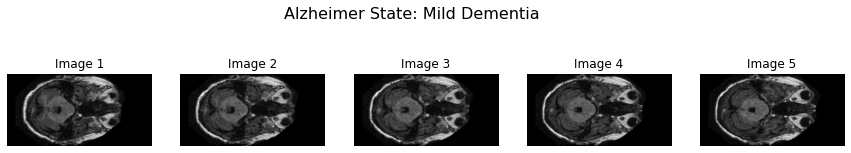

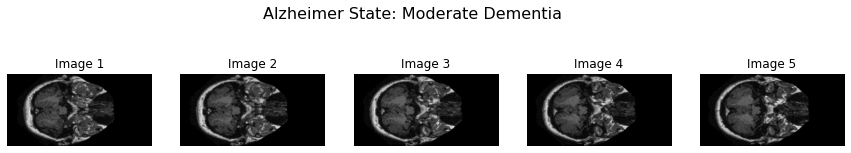

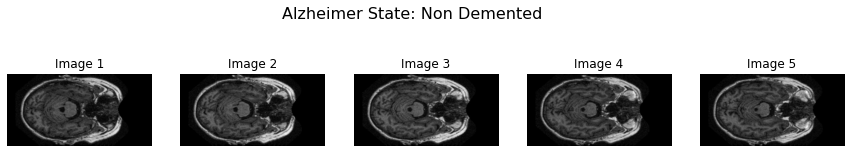

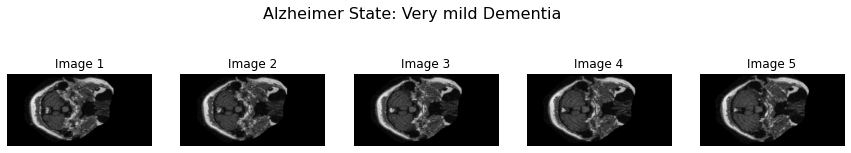

In [ ]:
for folder in image_classes:
    images = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
    images = images[:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Alzheimer State: {os.path.basename(folder)}", fontsize=16)

    for cnt, image_name in enumerate(images):
        image_location = os.path.join(folder, image_name)
        img = Image.open(image_location)

        plt.subplot(1, 5, cnt + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image {cnt+1}")

    plt.show()

Plotting Pixel intensity for Each Image Class

<Figure size 1080x216 with 0 Axes>

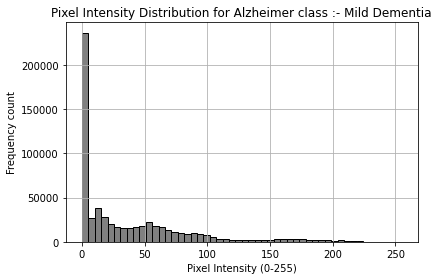

<Figure size 1080x216 with 0 Axes>

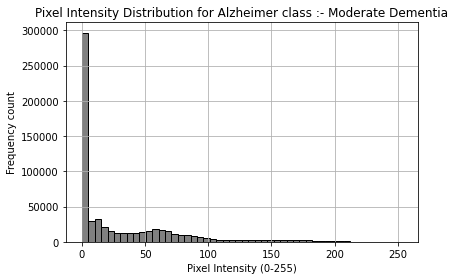

<Figure size 1080x216 with 0 Axes>

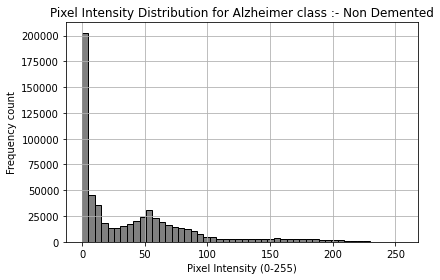

<Figure size 1080x216 with 0 Axes>

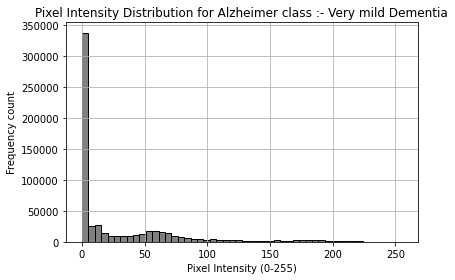

In [ ]:
for folder in image_classes:
    class_name = os.path.basename(folder)
    image_files = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
    image_files = image_files[:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Alzheimer State: {class_name} - Sample Class Images", fontsize=16)

    pixel_intensity_values = []
    for image_name in image_files:
        image_location = os.path.join(folder, image_name)
        img = Image.open(image_location).convert("L")
        pixel_intensity_values.extend(np.array(img).flatten())

    plt.figure(figsize=(6, 4))
    plt.hist(pixel_intensity_values, bins=50, color='gray', edgecolor='black')
    plt.title(f"Pixel Intensity Distribution for Alzheimer class :- {class_name}")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
class_image_counts = defaultdict(int)
image_sizes = []

for folder in image_classes:
    class_name = os.path.basename(folder)
    for image_name in os.listdir(folder):
        if image_name.lower().endswith('.jpg'):
            img_location = os.path.join(folder, image_name)
            class_image_counts[class_name] += 1

            try:
                with Image.open(img_location) as img:
                    image_sizes.append(img.size)
            except:
                print(f"Could not open image: {img_location}")

total_images = sum(class_image_counts.values())

widths, heights = zip(*image_sizes)
mean_size = (np.mean(widths), np.mean(heights))
min_size = (np.min(widths), np.min(heights))
max_size = (np.max(widths), np.max(heights))

print("ALZEIMER DATASET SUMMARY")
print("---------------------")
print(f"Total images  Count    : {total_images}")
print(f"Number of Alzeimer classes : {len(class_image_counts)}")
print("Images per Alzeimer class  :")
for class_name, count in class_image_counts.items():
    print(f"  - {class_name}: {count} images")

print("\nImage Size Info")
print(f"Average Image size      : {mean_size[0]:.1f} x {mean_size[1]:.1f}")
print(f"Min Image size          : {min_size[0]} x {min_size[1]}")
print(f"Max Image size          : {max_size[0]} x {max_size[1]}")


ALZEIMER DATASET SUMMARY
---------------------
Total images  Count    : 86437
Number of Alzeimer classes : 4
Images per Alzeimer class  :
  - Mild Dementia: 5002 images
  - Moderate Dementia: 488 images
  - Non Demented: 67222 images
  - Very mild Dementia: 13725 images

Image Size Info
Average Image size      : 496.0 x 248.0
Min Image size          : 496 x 248
Max Image size          : 496 x 248


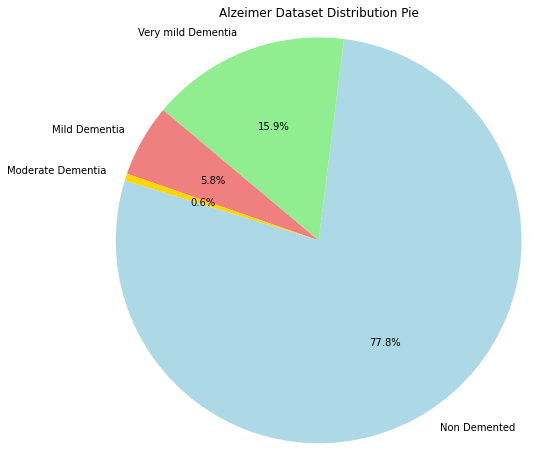

In [ ]:
labels = list(class_image_counts.keys())
sizes = list(class_image_counts.values())
colors = ['lightcoral', 'gold', 'lightblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Alzeimer Dataset Distribution Pie")
plt.axis('equal')
plt.show()


# Upsampling Minority classes

In [ ]:
target__class_count = 10000
augmentation_classes = ["Moderate Dementia", "Mild Dementia"]

augmentation_transformation = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
])

def augment_image(img):
    return augmentation_transformation(img)

for folder in image_classes:
    class_name = os.path.basename(folder)

    if class_name in augmentation_classes:
        existing_images = [f for f in os.listdir(folder) if f.lower().endswith('.jpg')]
        current_count = len(existing_images)

        print(f"Augmenting Alzeimer Class Images for '{class_name}': {current_count} → {target__class_count}")
        image_cnt = 0

        while len(os.listdir(folder)) < target__class_count:
            image_name = existing_images[image_cnt % current_count]
            image_loc = os.path.join(folder, image_name)

            with Image.open(image_loc) as img:
                img = img.convert("RGB")

                aug_img = augment_image(img)

                aug_img_name = f"aug_{image_cnt}_{image_name}"
                aug_img_path = os.path.join(folder, aug_img_name)
                aug_img.save(aug_img_path)

            image_cnt += 1

print("Data augmentation process completed.")

Augmenting Alzeimer Class Images for 'Mild Dementia': 5002 → 10000
Augmenting Alzeimer Class Images for 'Moderate Dementia': 488 → 10000
Data augmentation process completed.


# Splitting dataset

In [ ]:
# dataset_path = "/projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset"
labelled_path = "/projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset_labelled"
unlabelled_path = "/projects/academic/courses/cse676s25/pgulhane/alzheimer_dataset_unlabelled"


os.makedirs(labelled_path, exist_ok=True)
os.makedirs(unlabelled_path, exist_ok=True)
random.seed(42)

for class_name in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_folder_path):
        continue

    image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith('.jpg')]
    random.shuffle(image_files)

    labelled_files = image_files[:450]
    unlabelled_files = image_files[450:]

    labelled_class_path = os.path.join(labelled_path, class_name)
    os.makedirs(labelled_class_path, exist_ok=True)

    for fname in labelled_files:
        src = os.path.join(class_folder_path, fname)
        dst = os.path.join(labelled_class_path, fname)
        shutil.copy2(src, dst)

    for fname in unlabelled_files:
        src = os.path.join(class_folder_path, fname)
        dst = os.path.join(unlabelled_path, f"{class_name.replace(' ', '_')}_{fname}")
        shutil.copy2(src, dst)

print("Data split completed.")


Data split completed.


In [2]:
labelled_path = "/user/pgnanase/alzheimer_dataset_labelled"
unlabelled_path = "/user/pgnanase/alzheimer_dataset_unlabelled"

In [3]:
print("Dataset after Splitting into Labelled and Unlabelled images")
print("LABELLED DATASET")
print("-----------------")

for class_name in os.listdir(labelled_path):
    class_folder = os.path.join(labelled_path, class_name)
    if os.path.isdir(class_folder):
        num_images = len([f for f in os.listdir(class_folder) if f.lower().endswith('.jpg')])
        print(f"  - {class_name}: {num_images} images")

unlabelled_images = [f for f in os.listdir(unlabelled_path) if f.lower().endswith('.jpg')]

print("\nUNLABELLED DATASET")
print("-------------------")
print(f"Total unlabelled images: {len(unlabelled_images)}")


Dataset after Splitting into Labelled and Unlabelled images
LABELLED DATASET
-----------------
  - Mild Dementia: 450 images
  - Moderate Dementia: 450 images
  - Non Demented: 450 images
  - Very mild Dementia: 450 images

UNLABELLED DATASET
-------------------
Total unlabelled images: 99147


In [ ]:
pip install squarify

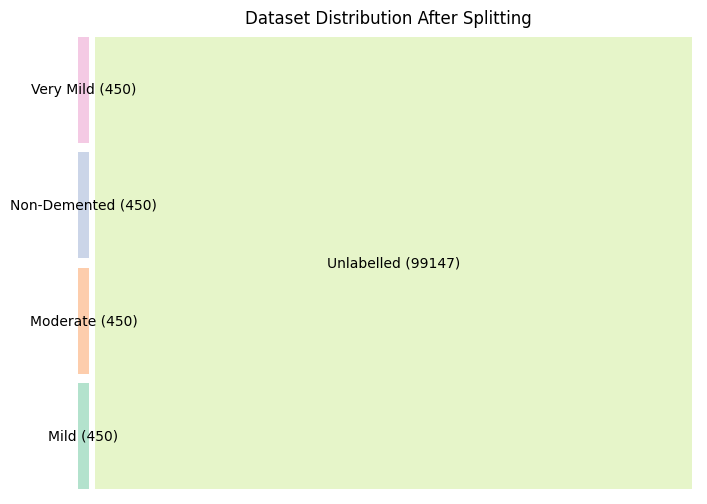

In [ ]:
import matplotlib.pyplot as plt
import squarify

labels = ['Mild (450)', 'Moderate (450)', 'Non-Demented (450)',
          'Very Mild (450)', 'Unlabelled (99147)']
sizes  = [450, 450, 450, 450, 99147]
colors = plt.cm.Pastel2([0,1,2,3,4])

plt.figure(figsize=(8,6))
squarify.plot(sizes=sizes, label=labels, color=colors, pad=True)
plt.title('Dataset Distribution After Splitting')
plt.axis('off')
plt.show()

# BASE MODEL: Resnet

In [4]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=False):
        super(ResidualBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, out_channels * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * 4)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = None

        if downsample:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * 4, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * 4)
            )

    def forward(self, x):
        identity = x
        if self.downsample is not None:
            identity = self.downsample(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        out += identity
        out = self.relu(out)

        return out


In [5]:
class ResNet50(nn.Module):
    def __init__(self, num_classes=1000):
        super(ResNet50, self).__init__()

        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(64, 3)
        self.layer2 = self._make_layer(128, 4, stride=2)
        self.layer3 = self._make_layer(256, 6, stride=2)
        self.layer4 = self._make_layer(512, 3, stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * 4, num_classes)

    def _make_layer(self, out_channels, blocks, stride=1):
        layers = []
        layers.append(ResidualBlock(self.in_channels, out_channels, stride, downsample=True))
        self.in_channels = out_channels * 4

        for _ in range(1, blocks):
            layers.append(ResidualBlock(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

# Base Model : PreTraining Using SimCLR

In [20]:
class SimCLRTransform:
    def __init__(self):
        self.transform = T.Compose([
            T.Resize((128, 128)),
            T.RandomResizedCrop(size=128),
            T.RandomHorizontalFlip(),
            T.RandomApply([T.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
            T.RandomGrayscale(p=0.2),
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])

    def __call__(self, x):
        return self.transform(x), self.transform(x)


In [21]:
class SimCLRModel(nn.Module):
    def __init__(self, projection_dim=128):
        super().__init__()
        resnet = ResNet50(num_classes = 4)
        self.encoder = nn.Sequential(*list(resnet.children())[:-1])
        self.projector = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, projection_dim)
        )

    def forward(self, x):
        h = self.encoder(x).squeeze()
        z = self.projector(h)
        return z

In [22]:
def nt_xent_loss(img1, img2, temperature=0.1):
    batch_size = img1.size(0)

    img1_norm = F.normalize(img1, dim=1)
    img2_norm = F.normalize(img2, dim=1)

    z = torch.cat([img1_norm, img2_norm], dim=0)

    sim = torch.matmul(z, z.T)
    sim = sim / temperature

    mask = torch.eye(2 * batch_size, dtype=torch.bool).to(z.device)
    sim = sim.masked_fill(mask, -1e9)

    positive_indices = torch.cat([torch.arange(batch_size, 2 * batch_size),
                                  torch.arange(0, batch_size)]).to(z.device)
    positives = sim[torch.arange(2 * batch_size), positive_indices]

    loss = -positives + torch.logsumexp(sim, dim=1)
    return loss.mean()


In [23]:
from torch.utils.data import Dataset
from PIL import Image
import os

class FlatImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, fname)
                            for fname in os.listdir(root_dir)
                            if fname.lower().endswith('.jpg')]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            return self.transform(img)
        else:
            return img


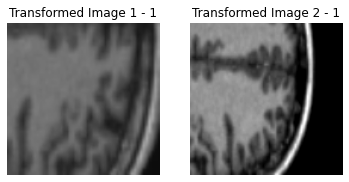

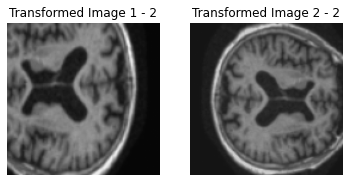

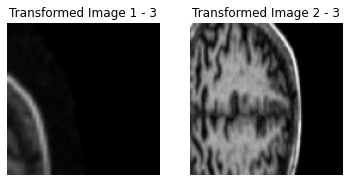

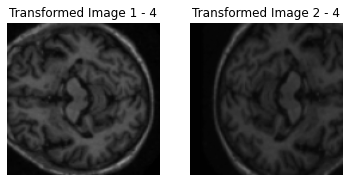

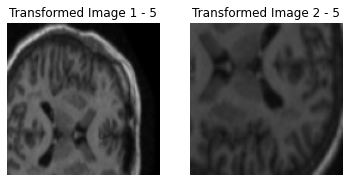

In [24]:
from torchvision.utils import make_grid

transform = SimCLRTransform()

unlabelled_dataset = FlatImageDataset(root_dir=unlabelled_path, transform=transform)
unlabelled_loader = DataLoader(unlabelled_dataset, batch_size=128, shuffle=True, num_workers=4)

for images in unlabelled_loader:
    image1, image2 = images

    for i in range(5):
        img1_denorm = (image1[i].permute(1,2,0) * 0.5 + 0.5)
        img2_denorm = (image2[i].permute(1,2,0) * 0.5 + 0.5)

        fig, axes = plt.subplots(1,2,figsize=(6,3))
        axes[0].imshow(img1_denorm)
        axes[0].set_title(f"Transformed Image 1 - {i+1}")
        axes[0].axis("off")

        axes[1].imshow(img2_denorm)
        axes[1].set_title(f"Transformed Image 2 - {i+1}")
        axes[1].axis("off")

        plt.show()
    break


In [ ]:
from torchsummary import summary

device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
model_SimCLR = SimCLRModel().to(device)
print(summary(model_SimCLR,(3,128,128)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 256, 32, 32]          16,384
       BatchNorm2d-6          [-1, 256, 32, 32]             512
            Conv2d-7           [-1, 64, 32, 32]           4,096
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

# Training on Unlabelled Dataset

In [25]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_SimCLR = SimCLRModel().to(device)
optimizer = torch.optim.Adam(model_SimCLR.parameters(), lr=1e-3)
epochs = 25

simclr_losses = []

train_start_time = time.time()

for epoch in range(epochs):
    model_SimCLR.train()
    total_loss = 0

    for img1, img2 in unlabelled_loader:
        img1, img2 = img1.to(device), img2.to(device)

        pred_img1 = model_SimCLR(img1)
        pred_img2 = model_SimCLR(img2)

        loss = nt_xent_loss(pred_img1, pred_img2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    simclr_losses.append(total_loss / len(unlabelled_loader))
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(unlabelled_loader):.4f}")

train_end_time = time.time()
training_time = train_end_time - train_start_time
print(f"\nTotal training time SimCLR model: {training_time:.2f} seconds")


Epoch [1/25], Loss: 4.4853
Epoch [2/25], Loss: 2.7594
Epoch [3/25], Loss: 2.0557
Epoch [4/25], Loss: 1.6805
Epoch [5/25], Loss: 1.4493
Epoch [6/25], Loss: 1.2778
Epoch [7/25], Loss: 1.1646
Epoch [8/25], Loss: 1.0536
Epoch [9/25], Loss: 0.9908
Epoch [10/25], Loss: 0.9264
Epoch [11/25], Loss: 0.8816
Epoch [12/25], Loss: 0.8136
Epoch [13/25], Loss: 0.7841
Epoch [14/25], Loss: 0.7512
Epoch [15/25], Loss: 0.7124
Epoch [16/25], Loss: 0.6849
Epoch [17/25], Loss: 0.6630
Epoch [18/25], Loss: 0.6360
Epoch [19/25], Loss: 0.6144
Epoch [20/25], Loss: 0.6017
Epoch [21/25], Loss: 0.5837
Epoch [22/25], Loss: 0.5584
Epoch [23/25], Loss: 0.5495
Epoch [24/25], Loss: 0.5371
Epoch [25/25], Loss: 0.5133

Total training time SimCLR model: 3673.30 seconds


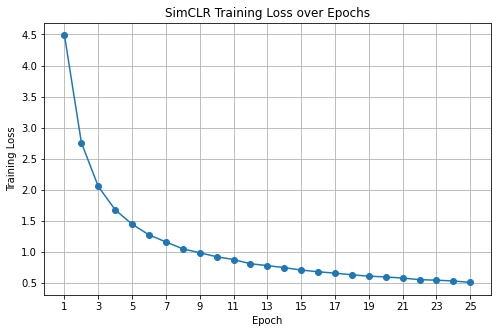

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(simclr_losses) + 1), simclr_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('SimCLR Training Loss over Epochs')
plt.xticks(range(1, len(simclr_losses) + 1, 2))
plt.grid(True)
plt.show()

In [27]:
save_path = "simclr_model_weights_25_epochs_temp_0.1.pth"
torch.save(model_SimCLR.state_dict(), save_path)

# Fine Tuning Pre-Trained model

Defining Train,Evaluation, Confusion Matrix Functions

In [28]:
simclr_finetune_train_losses      = []
simclr_finetune_val_losses        = []
simclr_finetune_train_accuracies  = []
simclr_finetune_val_accuracies    = []


def train_model(model, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc = 100 * correct / total
        val_acc, val_loss , all_preds, all_labels = evaluate_model(model, val_loader)

        simclr_finetune_train_losses.append(total_loss / len(train_loader))
        simclr_finetune_train_accuracies.append(train_acc)
        simclr_finetune_val_losses.append(val_loss)
        simclr_finetune_val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {total_loss/len(train_loader):.4f}, Train Acc: {train_acc:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

In [29]:
def evaluate_model(model, loader):
    model.eval()
    total_loss, correct, total = 0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    return accuracy, total_loss / len(loader), all_preds, all_labels

In [30]:
def plot_confusion_matrix(all_preds, all_labels,class_names,name):
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Alzeimer Class")
    plt.ylabel("Actual Alzeimer class")
    plt.title(f"Confusion Matrix For Classification using {name}")
    plt.show()

In [31]:
def performace_summary(y_true,y_pred,classes,output_dict=True):
  report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)
  overall_accuracy = accuracy_score(y_true, y_pred)

  print("\nPERFORMANCE SUMMARY")
  print("--------------------")

  for class_name in dataset.classes:
      precision = report[class_name]["precision"]
      recall = report[class_name]["recall"]
      f1 = report[class_name]["f1-score"]
      support = report[class_name]["support"]

      print(f"Class: {class_name}")
      print(f"  Precision : {precision:.4f}")
      print(f"  Recall    : {recall:.4f}")
      print(f"  F1-Score  : {f1:.4f}")
      print(f"  Support   : {support}")
      print("--------------------")

  print("Overall Metrics:")
  print(f"  Accuracy              : {overall_accuracy:.4f}")
  print(f"  Macro Avg Precision   : {report['macro avg']['precision']:.4f}")
  print(f"  Macro Avg Recall      : {report['macro avg']['recall']:.4f}")
  print(f"  Macro Avg F1-Score    : {report['macro avg']['f1-score']:.4f}")
  print(f"  Weighted Avg Precision: {report['weighted avg']['precision']:.4f}")
  print(f"  Weighted Avg Recall   : {report['weighted avg']['recall']:.4f}")
  print(f"  Weighted Avg F1-Score : {report['weighted avg']['f1-score']:.4f}")

In [32]:
transform_eval = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.ImageFolder(root=labelled_path, transform=transform_eval)

total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=2)

num_classes = len(dataset.classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
class LinearClassifier(nn.Module):
    def __init__(self, encoder, num_classes):
        super().__init__()
        self.encoder = encoder
        for param in self.encoder.parameters():
            param.requires_grad = True   # <-- UNFREEZE the encoder
        self.fc = nn.Linear(2048, num_classes)

    def forward(self, x):
        features = self.encoder(x).squeeze()   # <-- No torch.no_grad() anymore
        return self.fc(features)

In [52]:
model = SimCLRModel()

save_path = "simclr_model_weights_25_epochs_temp_0.1.pth"
model.load_state_dict(torch.load(save_path, map_location=device))
model.to(device)
model.eval()

encoder_weights = model.encoder

model_simCLR_fine_tuned = LinearClassifier(encoder=encoder_weights, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_simCLR_fine_tuned.parameters(), lr=1e-4)


In [53]:
start_time=time.time()
train_model(model_simCLR_fine_tuned, train_loader, val_loader, num_epochs=100)

train_time = time.time() - start_time
print(f"\nTraining Time SimCLR-Finetuned: {train_time:.2f} seconds")

Epoch 1/100, Train Loss: 1.2255, Train Acc: 48.65%, Val Loss: 1.1023, Val Acc: 57.41%
Epoch 2/100, Train Loss: 1.0212, Train Acc: 64.13%, Val Loss: 0.9659, Val Acc: 61.48%
Epoch 3/100, Train Loss: 0.8757, Train Acc: 69.76%, Val Loss: 0.8499, Val Acc: 68.15%
Epoch 4/100, Train Loss: 0.7496, Train Acc: 76.43%, Val Loss: 0.7604, Val Acc: 71.48%
Epoch 5/100, Train Loss: 0.6441, Train Acc: 80.24%, Val Loss: 0.6858, Val Acc: 74.81%
Epoch 6/100, Train Loss: 0.5470, Train Acc: 81.75%, Val Loss: 0.6129, Val Acc: 78.89%
Epoch 7/100, Train Loss: 0.4713, Train Acc: 84.05%, Val Loss: 0.5668, Val Acc: 78.89%
Epoch 8/100, Train Loss: 0.4008, Train Acc: 86.98%, Val Loss: 0.5188, Val Acc: 82.22%
Epoch 9/100, Train Loss: 0.3370, Train Acc: 90.24%, Val Loss: 0.4915, Val Acc: 81.11%
Epoch 10/100, Train Loss: 0.3199, Train Acc: 90.40%, Val Loss: 0.4881, Val Acc: 82.59%
Epoch 11/100, Train Loss: 0.2506, Train Acc: 92.54%, Val Loss: 0.4633, Val Acc: 81.85%
Epoch 12/100, Train Loss: 0.2022, Train Acc: 94.29%,

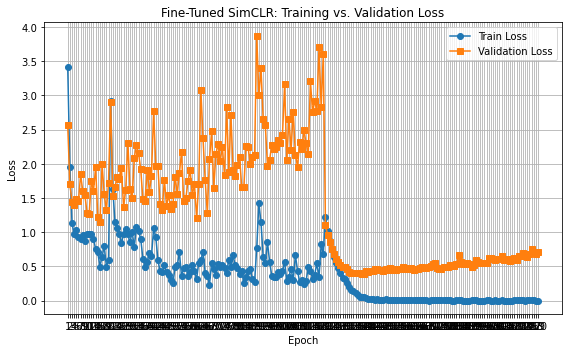

In [54]:
import matplotlib.pyplot as plt

epochs = range(1, len(simclr_finetune_train_losses) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, simclr_finetune_train_losses, marker='o', label='Train Loss')
plt.plot(epochs, simclr_finetune_val_losses, marker='s', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Fine-Tuned SimCLR: Training vs. Validation Loss')
plt.xticks(epochs)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Testing Model Performance

In [55]:
test_accuracy_simclr, test_loss_simclr, all_preds_simclr, all_labels_simclr = evaluate_model(model_simCLR_fine_tuned, test_loader)
print(f"Test Loss: {test_loss_simclr:.4f}, Test Accuracy: {test_accuracy_simclr:.2f}%")


Test Loss: 0.7373, Test Accuracy: 87.04%


In [56]:
simclr_finetune_test_losses     = [test_loss_simclr] * len(simclr_finetune_train_losses)
simclr_finetune_test_accuracies = [test_accuracy_simclr] * len(simclr_finetune_train_accuracies)


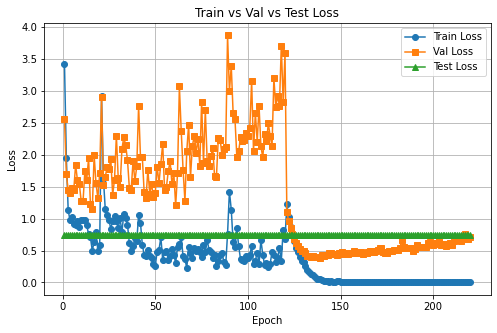

In [57]:
import matplotlib.pyplot as plt

epochs = range(1, len(simclr_finetune_train_losses) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, simclr_finetune_train_losses, marker='o', label='Train Loss')
plt.plot(epochs, simclr_finetune_val_losses, marker='s', label='Val Loss')
plt.plot(epochs, simclr_finetune_test_losses, marker='^', label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Val vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()

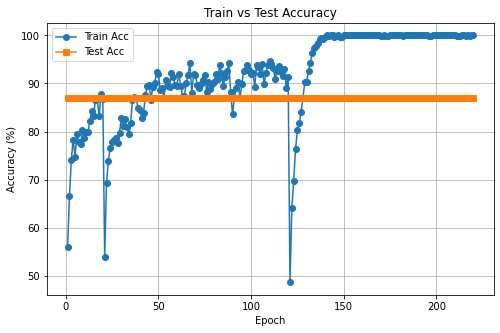

In [58]:
plt.figure(figsize=(8,5))
plt.plot(epochs, simclr_finetune_train_accuracies, marker='o', label='Train Acc')
plt.plot(epochs, simclr_finetune_test_accuracies, marker='s', label='Test Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Train vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
print("Classification Report:\n", classification_report(all_labels_simclr, all_preds_simclr, target_names=dataset.classes))
performace_summary(all_labels_simclr, all_preds_simclr, dataset.classes)

Classification Report:
                     precision    recall  f1-score   support

     Mild Dementia       0.83      0.93      0.88        76
 Moderate Dementia       1.00      0.98      0.99        58
      Non Demented       0.88      0.83      0.85        69
Very mild Dementia       0.81      0.75      0.78        67

          accuracy                           0.87       270
         macro avg       0.88      0.87      0.87       270
      weighted avg       0.87      0.87      0.87       270


PERFORMANCE SUMMARY
--------------------
Class: Mild Dementia
  Precision : 0.8256
  Recall    : 0.9342
  F1-Score  : 0.8765
  Support   : 76
--------------------
Class: Moderate Dementia
  Precision : 1.0000
  Recall    : 0.9828
  F1-Score  : 0.9913
  Support   : 58
--------------------
Class: Non Demented
  Precision : 0.8769
  Recall    : 0.8261
  F1-Score  : 0.8507
  Support   : 69
--------------------
Class: Very mild Dementia
  Precision : 0.8065
  Recall    : 0.7463
  F1-Score  : 

Confusion Matrix

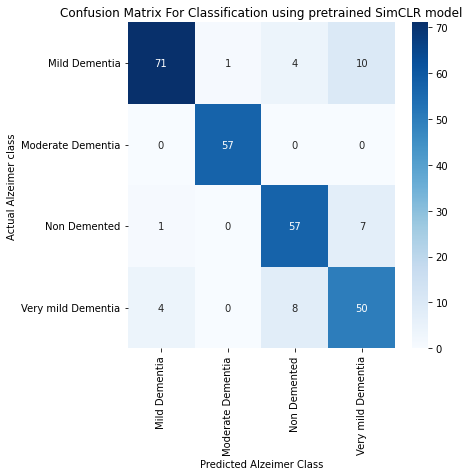

In [60]:
plot_confusion_matrix(all_labels_simclr, all_preds_simclr,dataset.classes,"pretrained SimCLR model")

In [61]:
torch.save(model_simCLR_fine_tuned.state_dict(), "SimCLR_finetuned.pth")

# ResNet-50

In [ ]:
from torchsummary import summary

print(summary(model_resnet50,(3,128,128)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5          [-1, 256, 32, 32]          16,384
       BatchNorm2d-6          [-1, 256, 32, 32]             512
            Conv2d-7           [-1, 64, 32, 32]           4,096
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 256, 32, 32]          16,384
      BatchNorm2d-14          [-1, 256,

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_resnet50 = ResNet50(num_classes=4).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet50.parameters(), lr=2e-4)

start_time=time.time()
train_model(model_resnet50, train_loader, val_loader, num_epochs=200)
train_time = time.time() - start_time
print(f"\nTraining Time ResNet-50 Model: {train_time:.2f} seconds")

test_accuracy_resnet50, test_loss_resnet50, all_preds_resnet50, all_labels_resnet50 = evaluate_model(model_resnet50, test_loader)
print(f"Test Loss: {test_loss_resnet50:.4f}, Test Accuracy: {test_accuracy_resnet50:.2f}%")


Epoch 1/200, Train Loss: 1.3948, Train Acc: 36.11%, Val Loss: 1.5111, Val Acc: 29.63%
Epoch 2/200, Train Loss: 1.0000, Train Acc: 56.11%, Val Loss: 1.9846, Val Acc: 28.89%
Epoch 3/200, Train Loss: 0.6780, Train Acc: 74.21%, Val Loss: 2.5749, Val Acc: 45.19%
Epoch 4/200, Train Loss: 0.4787, Train Acc: 81.83%, Val Loss: 1.1934, Val Acc: 57.41%
Epoch 5/200, Train Loss: 0.2931, Train Acc: 89.76%, Val Loss: 1.0375, Val Acc: 67.41%
Epoch 6/200, Train Loss: 0.2705, Train Acc: 90.40%, Val Loss: 1.8748, Val Acc: 57.78%
Epoch 7/200, Train Loss: 0.2503, Train Acc: 91.67%, Val Loss: 1.3172, Val Acc: 68.89%
Epoch 8/200, Train Loss: 0.1818, Train Acc: 92.46%, Val Loss: 1.0158, Val Acc: 70.00%
Epoch 9/200, Train Loss: 0.1257, Train Acc: 95.87%, Val Loss: 1.0274, Val Acc: 72.59%
Epoch 10/200, Train Loss: 0.0830, Train Acc: 97.14%, Val Loss: 1.3023, Val Acc: 69.26%
Epoch 11/200, Train Loss: 0.1054, Train Acc: 96.75%, Val Loss: 0.6861, Val Acc: 79.26%
Epoch 12/200, Train Loss: 0.0581, Train Acc: 98.02%,

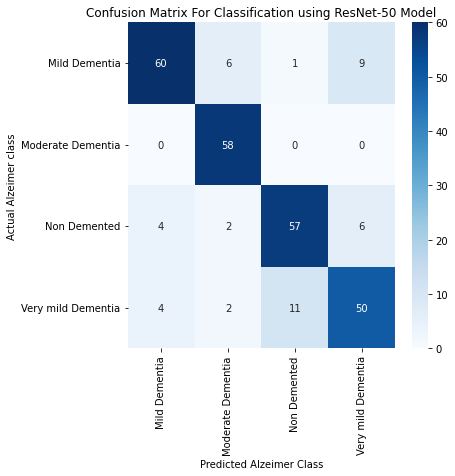

In [17]:
plot_confusion_matrix(all_preds_resnet50, all_labels_resnet50,dataset.classes,"ResNet-50 Model")

In [15]:
print("Classification Report:\n", classification_report(all_labels_resnet50, all_preds_resnet50, target_names=dataset.classes))
performace_summary(all_labels_resnet50, all_preds_resnet50, dataset.classes)

Classification Report:
                     precision    recall  f1-score   support

     Mild Dementia       0.88      0.79      0.83        76
 Moderate Dementia       0.85      1.00      0.92        58
      Non Demented       0.83      0.83      0.83        69
Very mild Dementia       0.77      0.75      0.76        67

          accuracy                           0.83       270
         macro avg       0.83      0.84      0.83       270
      weighted avg       0.83      0.83      0.83       270


PERFORMANCE SUMMARY
--------------------
Class: Mild Dementia
  Precision : 0.8824
  Recall    : 0.7895
  F1-Score  : 0.8333
  Support   : 76
--------------------
Class: Moderate Dementia
  Precision : 0.8529
  Recall    : 1.0000
  F1-Score  : 0.9206
  Support   : 58
--------------------
Class: Non Demented
  Precision : 0.8261
  Recall    : 0.8261
  F1-Score  : 0.8261
  Support   : 69
--------------------
Class: Very mild Dementia
  Precision : 0.7692
  Recall    : 0.7463
  F1-Score  : 

In [ ]:
torch.save(model_resnet50.state_dict(), "ResNet_50.pth")

# Evaluation Summary

We can see from the table below that performing supervised learning over the representations learned from unsupervised set of images using SimCLR model performs better then that of Resnet50 model trained on the same set of images ie 450 images per class.

We can see that the accuracy of Resnet model is less than that of self-supervised model as it is not able to learn the representations from smaller set of images.

If we compare the training time, self-supervised model performs little slow but model is yet to be fine tuned , so it would perform in comparable time with respect to resnet.

<table >
    <tr>
        <th > Model <th>
        <th> Test Accuracy <th>
        <th> Test Loss <th>
        <th> Precision <th>
        <th> Recall <th>
        <th> F1 Score <th>
        <th> Training Time <th>
    <tr>
    <tr>
        <td> Base ResNet50 Model <td>
        <td> 74.44% <td>
        <td> 1.1514 <td>
        <td> 0.7835 <td>
        <td> 0.7528 <td>
        <td> 0.7419 <td>
        <td> 22.76 sec <td>
    <tr>
    <tr>
        <td> SimCLR preTrianed-FineTuned Model<td>
        <td> 82.59% <td>
        <td> 0.8359 <td>
        <td> 0.8270 <td>
        <td> 0.8316 <td>
        <td> 0.8287 <td>
        <td> 43.71 sec <td>
    <tr>
<table>
   

This is our base Self-Supervised learning model, after fine-tuning the model , it would perform even better, We plan to explore different self-supervised learning models which would outperform these models

# Goals

1) Training Self-Supervised models like BYOL, MoCo, etc and finetuning models to get Better accuracy

2) Utilizing the pretrained models to be used for other disease detection involving MRI scans, like tumors.

# References

1)[2309.13167] Flow Factorized Representation Learning

2)[2301.05712] A Survey on Self-supervised Learning: Algorithms, Applications, and Future Trends

3)Self-Supervised Representation Learning | Lil'Log

4)https://arxiv.org/pdf/1512.03385

5)https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

6)https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

